In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle("high_level_features_with_embeddings.pkl")

In [3]:
df

,id,name,artist,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,audio_path,audio_embedding
332,7pFydJbDEToJHtvl6g579k,(Forever) Live And Die,Orchestral Manoeuvres In The Dark,218133,0.605,0.545,0,-13.603,1,0.0297,0.090200,0.244000,0.1490,0.865,90.179,/Volumes/datascience/data/audio/014/dupqWAcdo9...,"[[-0.8878629, -1.3449554, -2.8636615, -3.24620..."
471,6W7ztLBiRzBN46ZaPAcQ0F,"(I've Had) The Time Of My Life - From ""Dirty D...",Bill Medley,290333,0.697,0.669,6,-12.723,0,0.0406,0.040400,0.008970,0.0654,0.486,108.506,/Volumes/datascience/data/audio/088/4BQLE_RrTS...,"[[-1.2157842, -1.08581, -4.5545697, -5.6974816..."
575,4tlryZypTlbIaa7YrgxCSN,(She's Got) Skillz,All-4-One,245067,0.942,0.595,8,-9.781,0,0.0458,0.152000,0.000142,0.0861,0.958,100.410,/Volumes/datascience/data/audio/012/W_3q9YjCcB...,"[[-1.72662, -1.4676812, -3.0371087, -3.3956811..."
773,3MjUtNVVq3C8Fn0MP3zhXa,...Baby One More Time,Britney Spears,211067,0.759,0.699,0,-5.745,0,0.0307,0.202000,0.000131,0.4430,0.907,92.960,/Volumes/datascience/data/audio/067/fEfvTTJNeA...,"[[-2.9154773, -0.2824071, -3.9800394, -4.17289..."
832,2wOXxtHZgRkkrkEbKLzzqs,1.5,21 Savage,148656,0.885,0.520,1,-8.353,1,0.3590,0.000244,0.000001,0.4540,0.306,84.022,/Volumes/datascience/data/audio/084/GRTNpSVrMo...,"[[-3.8795433, -3.8839307, -4.056024, -4.438593..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502818,1IjuevPDJ8Sa97wFwQ5j4V,Happier - Frank Walker Remix,Marshmello,196571,0.712,0.646,5,-4.230,1,0.1820,0.116000,0.000000,0.1230,0.607,104.998,/Volumes/datascience/data/audio/033/vEsaI8LgFV...,"[[-1.7670367, -1.6991587, -2.7883785, -2.79677..."
1502896,4UtV7K4ekqVyRT6EyNQOon,Bad Idea!,Unclenathannn,162482,0.713,0.342,9,-16.991,0,0.0447,0.469000,0.155000,0.1040,0.694,129.935,/Volumes/datascience/data/audio/009/cX1-pTLi4c...,"[[-3.0580392, -2.8782334, -2.9476802, -2.41816..."
1503095,1gBvWYAo67gx97mK62hwKg,Sex for Breakfast,Lo'fi Boy,146963,0.858,0.271,9,-15.047,0,0.4700,0.658000,0.002930,0.0789,0.475,96.998,/Volumes/datascience/data/audio/100/NqnzDykMFM...,"[[-3.3847785, -2.8208435, -3.3452582, -3.04685..."
1503491,73tTDsjutmpFg31yIEvx8B,Rightfully (TV Animation Goblin Slayer opening),Mili,213333,0.390,0.724,4,-6.015,0,0.0635,0.004230,0.000097,0.1020,0.301,181.910,/Volumes/datascience/data/audio/020/7z4WJAEG3u...,"[[-1.4800369, -1.7014531, -2.4218705, -2.33129..."


In [18]:
df = df.dropna(subset=["audio_embedding"])

In [ ]:
X, y = df["audio_embedding"], df[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
X = X.apply(lambda x: x[0])
summary_statistics = y.describe()
print("Summary Statistics for Each Variable in y:")
print(summary_statistics)

Summary Statistics for Each Variable in y:
       danceability       energy     loudness  speechiness  acousticness  \
count   1587.000000  1587.000000  1587.000000  1587.000000   1587.000000   
mean       0.639362     0.639959    -7.118361     0.091428      0.231926   
std        0.154785     0.207777     4.157869     0.093611      0.275942   
min        0.067200     0.001510   -41.808000     0.022900      0.000002   
25%        0.542000     0.508000    -8.229500     0.036750      0.021000   
50%        0.655000     0.668000    -6.168000     0.051200      0.110000   
75%        0.747000     0.800500    -4.806000     0.098800      0.356000   
max        0.980000     0.995000     1.023000     0.699000      0.996000   

       instrumentalness     liveness      valence  
count       1587.000000  1587.000000  1587.000000  
mean           0.078131     0.174750     0.503169  
std            0.225910     0.128362     0.234966  
min            0.000000     0.017100     0.026600  
25%         

In [58]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import torch.nn as nn
import torch.optim as optim

class MusicDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class MusicPredictor(nn.Module):
    def __init__(self):
        super(MusicPredictor, self).__init__()
        self.fc1 = nn.Linear(50, 128)
        #self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 8)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        #x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    list(X), y.values, test_size=0.2, random_state=42
)

# Prepare the training and testing datasets
train_dataset = MusicDataset(X_train, y_train)
test_dataset = MusicDataset(X_test, y_test)

# Move datasets to the appropriate device
train_dataset.X = train_dataset.X.to(device)
train_dataset.y = train_dataset.y.to(device)
test_dataset.X = test_dataset.X.to(device)
test_dataset.y = test_dataset.y.to(device)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Using device: cpu


Using device: cpu
Epoch 1/500, Training Loss: 3.791458983719349, Test Loss: 1.9626541018486023
Epoch 2/500, Training Loss: 2.284472303837538, Test Loss: 1.7725136995315551
Epoch 3/500, Training Loss: 2.0437060788273813, Test Loss: 1.561432993412018
Epoch 4/500, Training Loss: 1.7664795100688935, Test Loss: 1.2986493051052093
Epoch 5/500, Training Loss: 1.464068229496479, Test Loss: 1.0513256341218948
Epoch 6/500, Training Loss: 1.2267689563333988, Test Loss: 1.1017583668231965
Epoch 7/500, Training Loss: 1.0783894687891007, Test Loss: 0.9343799501657486
Epoch 8/500, Training Loss: 1.0026912435889244, Test Loss: 0.8672443628311157
Epoch 9/500, Training Loss: 0.9727920226752758, Test Loss: 0.9275940746068955
Epoch 10/500, Training Loss: 0.9485321193933487, Test Loss: 0.8477738171815872
Epoch 11/500, Training Loss: 0.9406810067594051, Test Loss: 0.8411945998668671
Epoch 12/500, Training Loss: 0.9238854594528675, Test Loss: 0.9032275199890136
Epoch 13/500, Training Loss: 0.9546791650354862

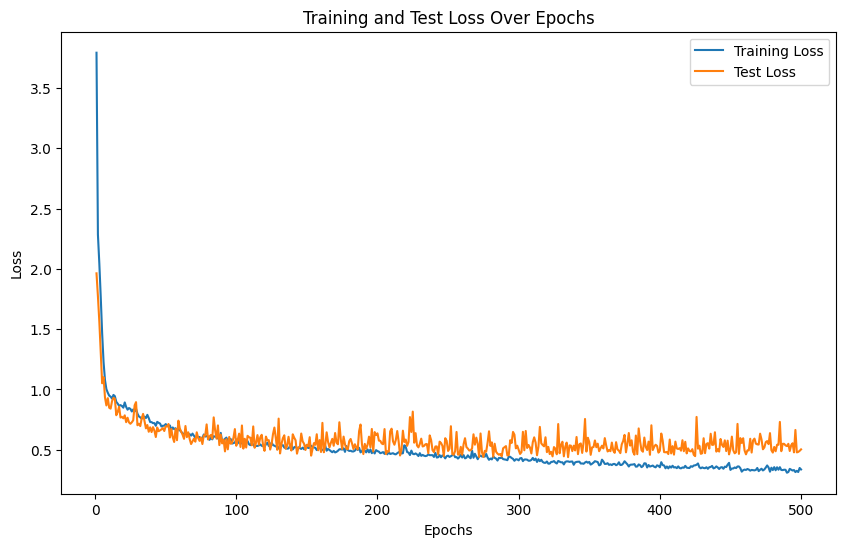

In [60]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model, loss function, and optimizer
model = MusicPredictor().to(device)
criterion = nn.MSELoss()
#criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
# Initialize lists to store training and test losses
train_losses = []
test_losses = []

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on the test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_dataloader))

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}")

# Plot the training and test losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

Epoch 500/500, Training Loss: 0.21130117177963256, Test Loss: 0.25455379784107207


In [54]:
error_per_feature[0].shape

(8,)

In [62]:
import numpy as np
# Recompute predictions for the entire test set
model.eval()
with torch.no_grad():
    predictions = torch.cat([model(batch_X.to(device)) for batch_X, _ in test_dataloader], dim=0)
# Calculate the Mean Absolute Error (MAE) for each feature
errors = np.abs(y_test - predictions.cpu().numpy())
percent_errors = 100 * np.abs((y_test - predictions.cpu().numpy()) / y_test)
mean_percent_error = np.mean(percent_errors, axis=0)
min_percent_error = np.min(percent_errors, axis=0)
max_percent_error = np.max(percent_errors, axis=0)
std_percent_error = np.std(percent_errors, axis=0)


#e = np.min(errors, axis=0), np.mean(errors, axis=0), np.max(errors, axis=0), np.std(errors, axis=0)
#min_ae, mae, max_ae, std_ae = e[0], e[1], e[2], e[3]

# Print the MAE for each feature
feature_names = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
for feature, mine, meane, maxe, stde in zip(feature_names, min_percent_error, mean_percent_error, max_percent_error, std_percent_error):
    print(f"min AE for {feature}:    {mine:.4f}")
    print(f"MAE for {feature}:       {meane:.4f}")
    print(f"max AE for {feature}:    {maxe:.4f}")
    print(f"std of AE for {feature}: {stde:.4f}")
    print("")

min AE for danceability:    0.0027
MAE for danceability:       15.2954
max AE for danceability:    145.1547
std of AE for danceability: 16.7740

min AE for energy:    0.0796
MAE for energy:       21.1227
max AE for energy:    1420.7419
std of AE for energy: 81.1945

min AE for loudness:    0.0728
MAE for loudness:       20.9533
max AE for loudness:    209.5470
std of AE for loudness: 21.8600

min AE for speechiness:    0.3691
MAE for speechiness:       71.6495
max AE for speechiness:    388.4755
std of AE for speechiness: 59.5316

min AE for acousticness:    0.7821
MAE for acousticness:       5434.0502
max AE for acousticness:    715679.3824
std of AE for acousticness: 47127.7552

min AE for instrumentalness:    2.3192
MAE for instrumentalness:       inf
max AE for instrumentalness:    inf
std of AE for instrumentalness: nan

min AE for liveness:    0.0807
MAE for liveness:       68.3304
max AE for liveness:    659.3244
std of AE for liveness: 85.2248

min AE for valence:    0.0214
MAE

/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/3161538100.py:8: RuntimeWarning: divide by zero encountered in divide
  percent_errors = 100 * np.abs((y_test - predictions.cpu().numpy()) / y_test)
/Users/dennisfj/Michigan/northstarsound/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


min AE for danceability:    0.0002
MAE for danceability:       0.0802
max AE for danceability:    0.3915
std of AE for danceability: 0.0640

min AE for energy:    0.0003
MAE for energy:       0.0858
max AE for energy:    0.4083
std of AE for energy: 0.0705

min AE for loudness:    0.0029
MAE for loudness:       1.4524
max AE for loudness:    13.4721
std of AE for loudness: 1.6032

min AE for speechiness:    0.0002
MAE for speechiness:       0.0528
max AE for speechiness:    0.4046
std of AE for speechiness: 0.0609

min AE for acousticness:    0.0001
MAE for acousticness:       0.1142
max AE for acousticness:    0.5660
std of AE for acousticness: 0.0998

min AE for instrumentalness:    0.0000
MAE for instrumentalness:       0.0797
max AE for instrumentalness:    0.6683
std of AE for instrumentalness: 0.1048

min AE for liveness:    0.0001
MAE for liveness:       0.0842
max AE for liveness:    0.6179
std of AE for liveness: 0.0842

min AE for valence:    0.0002
MAE for valence:       0.1286
max AE for valence:    0.5613
std of AE for valence: 0.0947

MAE for danceability: 0.0794
MAE for energy: 0.0865
MAE for loudness: 1.5116
MAE for speechiness: 0.0502
MAE for acousticness: 0.1163
MAE for instrumentalness: 0.0806
MAE for liveness: 0.0918
MAE for valence: 0.1387

/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/2053778284.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/2053778284.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_predicted_values[:, i], label="Predicted Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/2053778284.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_6592

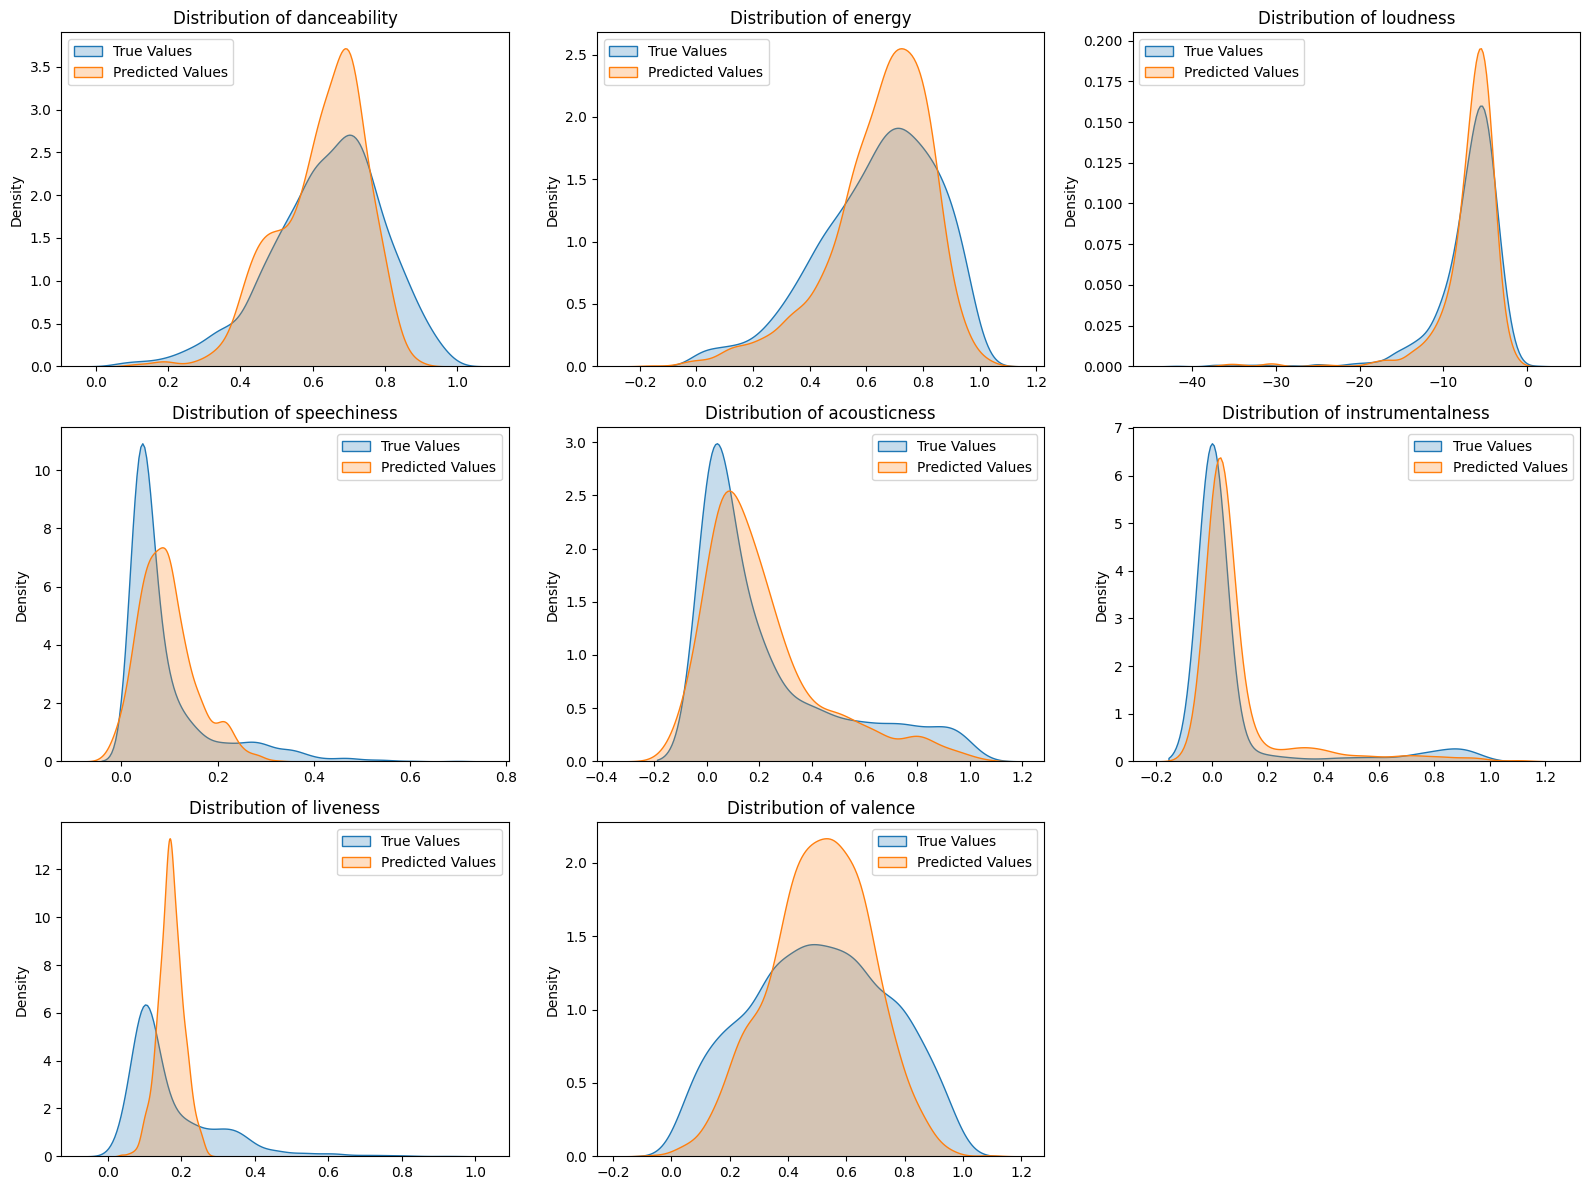

In [64]:
import seaborn as sns

import matplotlib.pyplot as plt

# Combine the true values and predicted values for the entire dataset
all_true_values = np.vstack((y_train, y_test))
all_predicted_values = np.vstack(
    (
    model(torch.tensor(X_train, dtype=torch.float32).to(device)).cpu().detach().numpy(),
    model(torch.tensor(X_test, dtype=torch.float32).to(device)).cpu().detach().numpy()
    )
    )

# Create KDE plots for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
    sns.kdeplot(all_predicted_values[:, i], label="Predicted Values", shade=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()

plt.tight_layout()
plt.show()

In [99]:
X, y = df["audio_embedding"], df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness"]]
X = X.apply(lambda x: x[0])
summary_statistics = y.describe()
print("Summary Statistics for Each Variable in y:")
print(summary_statistics)

Summary Statistics for Each Variable in y:
       danceability       energy  speechiness  acousticness  instrumentalness
count   1587.000000  1587.000000  1587.000000   1587.000000       1587.000000
mean       0.639362     0.639959     0.091428      0.231926          0.078131
std        0.154785     0.207777     0.093611      0.275942          0.225910
min        0.067200     0.001510     0.022900      0.000002          0.000000
25%        0.542000     0.508000     0.036750      0.021000          0.000000
50%        0.655000     0.668000     0.051200      0.110000          0.000002
75%        0.747000     0.800500     0.098800      0.356000          0.000713
max        0.980000     0.995000     0.699000      0.996000          0.985000


Using device: cpu
Using device: cpu
Epoch 1/500, Training Loss: 0.1194038487970829, Test Loss: 0.05573110952973366
Epoch 2/500, Training Loss: 0.047903676703572276, Test Loss: 0.04329351745545864
Epoch 3/500, Training Loss: 0.039986002771183846, Test Loss: 0.037553726322948934
Epoch 4/500, Training Loss: 0.03487268653698265, Test Loss: 0.032771918550133707
Epoch 5/500, Training Loss: 0.03082341398112476, Test Loss: 0.029495627246797086
Epoch 6/500, Training Loss: 0.02790215387940407, Test Loss: 0.027224877662956715
Epoch 7/500, Training Loss: 0.02591902078129351, Test Loss: 0.02573385089635849
Epoch 8/500, Training Loss: 0.024322299333289266, Test Loss: 0.024080539494752883
Epoch 9/500, Training Loss: 0.023022877494804563, Test Loss: 0.02290321495383978
Epoch 10/500, Training Loss: 0.02198675163090229, Test Loss: 0.022270084358751774
Epoch 11/500, Training Loss: 0.021326734544709326, Test Loss: 0.021494631282985212
Epoch 12/500, Training Loss: 0.020635769749060274, Test Loss: 0.0209540

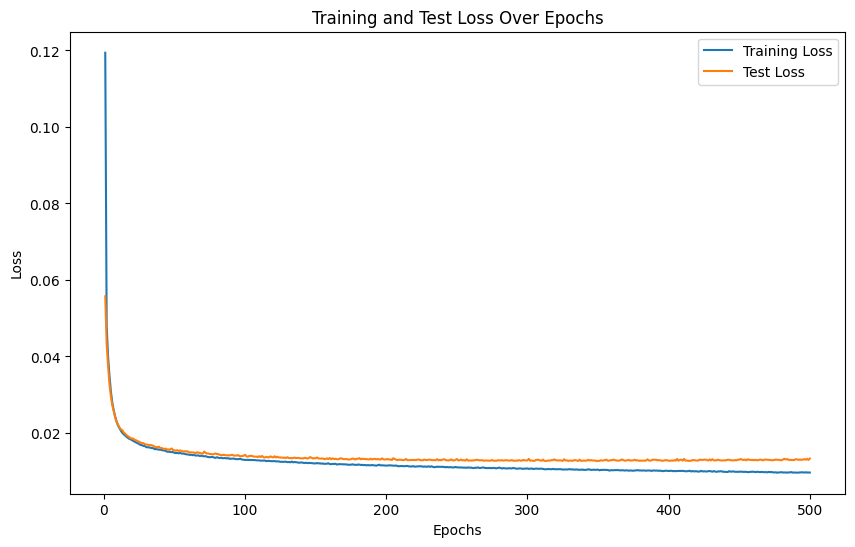

In [100]:

class MusicDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class MusicPredictor(nn.Module):
    def __init__(self):
        super(MusicPredictor, self).__init__()
        self.fc1 = nn.Linear(50, 128)
        #self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        #x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    list(X), y.values, test_size=0.2, random_state=42
)

# Prepare the training and testing datasets
train_dataset = MusicDataset(X_train, y_train)
test_dataset = MusicDataset(X_test, y_test)

# Move datasets to the appropriate device
train_dataset.X = train_dataset.X.to(device)
train_dataset.y = train_dataset.y.to(device)
test_dataset.X = test_dataset.X.to(device)
test_dataset.y = test_dataset.y.to(device)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model, loss function, and optimizer
model = MusicPredictor().to(device)
criterion = nn.MSELoss()
#criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)
# Initialize lists to store training and test losses
train_losses = []
test_losses = []

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on the test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_dataloader))

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}")

# Plot the training and test losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()


/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/3155373003.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/3155373003.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_predicted_values[:, i], label="Predicted Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/3155373003.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_6592

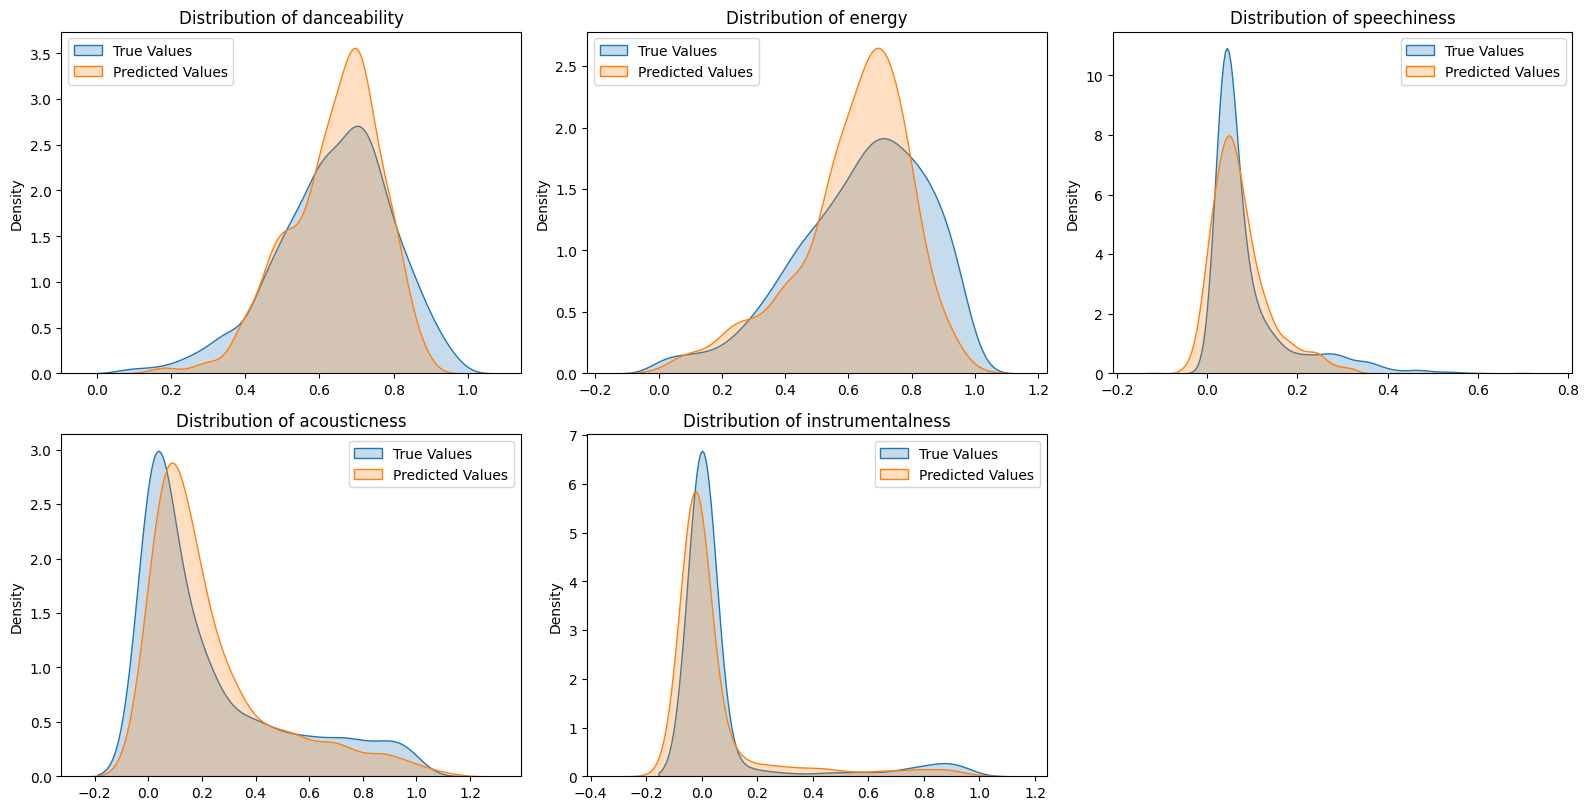

In [102]:

# Combine the true values and predicted values for the entire dataset
all_true_values = np.vstack((y_train, y_test))
all_predicted_values = np.vstack(
    (
    model(torch.tensor(X_train, dtype=torch.float32).to(device)).cpu().detach().numpy(),
    model(torch.tensor(X_test, dtype=torch.float32).to(device)).cpu().detach().numpy()
    )
    )

feature_names = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness"]

# Create KDE plots for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
    sns.kdeplot(all_predicted_values[:, i], label="Predicted Values", shade=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()

plt.tight_layout()
plt.show()

In [104]:
list(X)

[array([-0.8878629, -1.3449554, -2.8636615, -3.2462022, -4.0382257,
        -3.2233224, -4.4456387, -4.8751984, -3.7157636, -4.2939653,
        -4.6524615, -4.9269586, -5.017336 , -4.037478 , -2.5901494,
        -3.407816 , -4.466514 , -4.8710985, -5.3683577, -1.4849398,
        -4.442642 , -3.2254295, -5.269441 , -3.8602083, -5.396636 ,
        -4.454767 , -3.9978132, -3.7468927, -5.5737877, -5.4373226,
        -5.0992703, -5.250586 , -4.2885737, -6.4203563, -3.6575902,
        -5.680656 , -3.7789927, -4.7326355, -5.292317 , -4.9298725,
        -4.1850543, -6.415623 , -5.256399 , -3.1051457, -5.0954795,
        -5.068178 , -4.95485  , -5.805944 , -6.9774523, -5.5389957],
       dtype=float32),
 array([-1.2157842 , -1.08581   , -4.5545697 , -5.6974816 , -6.19451   ,
        -3.3036046 , -5.1545377 , -7.0998683 , -5.6696925 , -5.346296  ,
        -5.8181777 , -6.114385  , -7.3170643 , -4.164726  , -2.1358044 ,
        -2.5495603 , -7.218049  , -6.018757  , -7.6000204 , -0.55269223,
    

/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/1240960466.py:6: RuntimeWarning: divide by zero encountered in divide
  percent_errors = 100 * ((y_test - predictions.cpu().numpy()) / y_test)


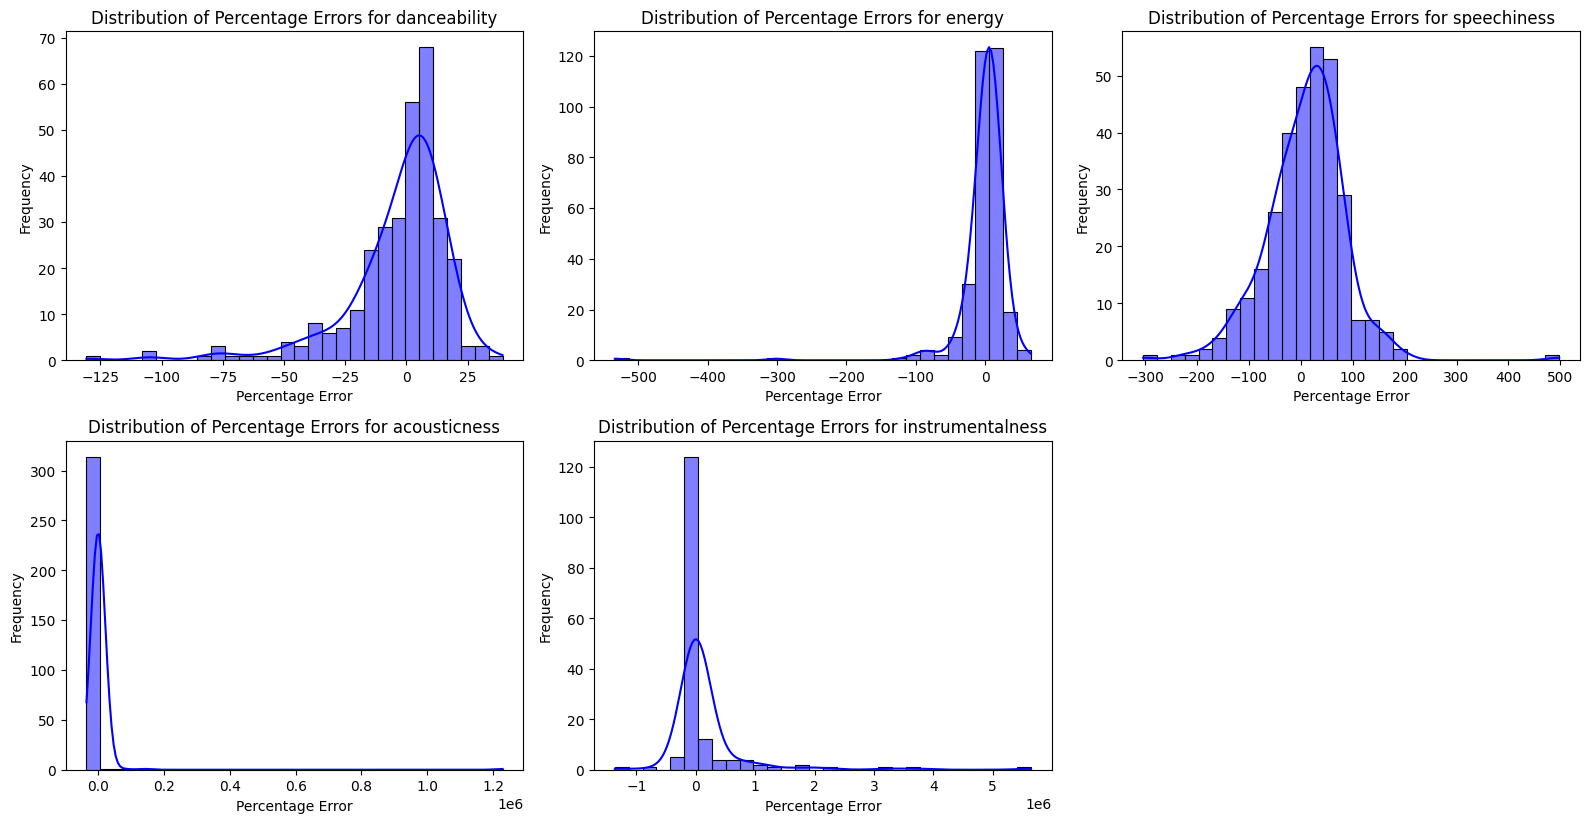

In [103]:
# Recompute predictions for the entire test set
model.eval()
with torch.no_grad():
    predictions = torch.cat([model(batch_X.to(device)) for batch_X, _ in test_dataloader], dim=0)
# Calculate the Mean Absolute Error (MAE) for each feature
percent_errors = 100 * ((y_test - predictions.cpu().numpy()) / y_test)


#e = np.min(errors, axis=0), np.mean(errors, axis=0), np.max(errors, axis=0), np.std(errors, axis=0)
#min_ae, mae, max_ae, std_ae = e[0], e[1], e[2], e[3]

# Print the MAE for each feature
# Plot the distribution of percentage errors for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    sns.histplot(percent_errors[:, i], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of Percentage Errors for {feature}")
    plt.xlabel("Percentage Error")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [112]:
len(X_reduced)

1587

In [115]:
y_reduced = [yv for yv in y.values]

In [118]:
X_reduced_3d.shape

(1587, 3)

In [119]:
y.values[:, 0]

array([0.605, 0.697, 0.942, ..., 0.858, 0.39 , 0.762])

In [116]:
len(y_reduced)

1587

/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/1943544047.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


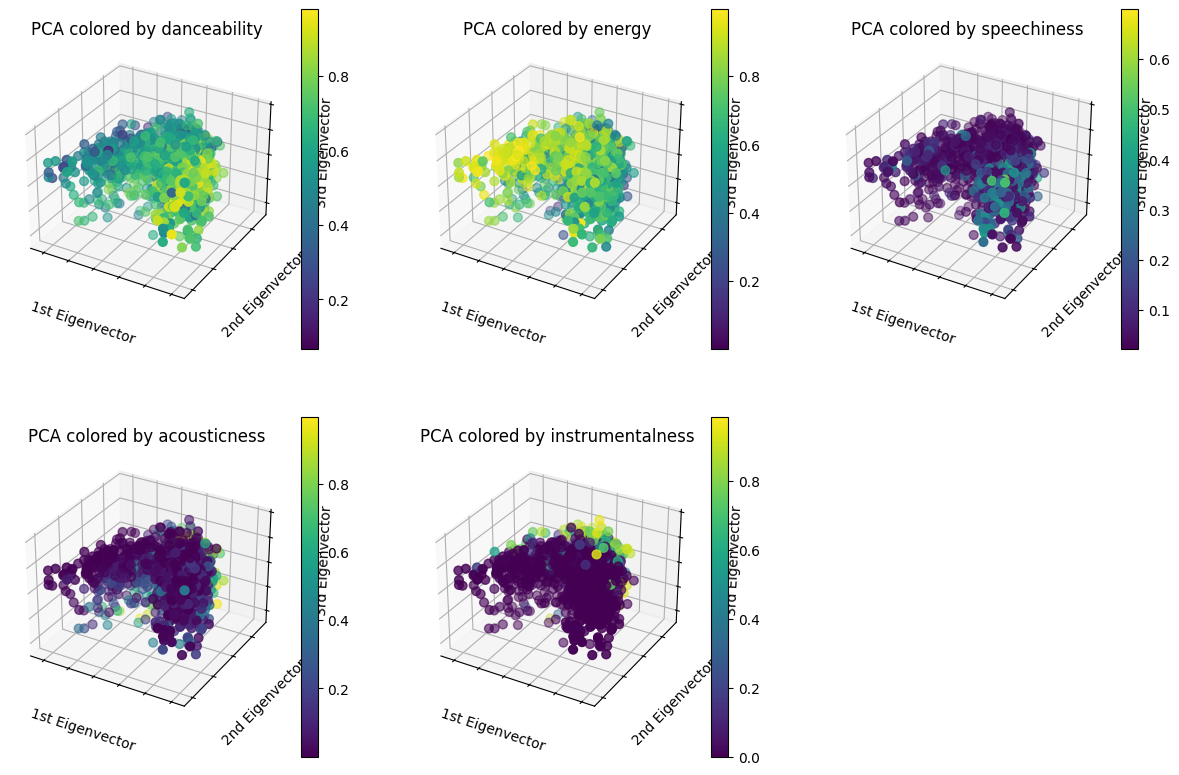

In [121]:

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

X_reduced = list(X)
y_reduced = y.values

# Use the first three principal components
X_reduced_3d = PCA(n_components=3).fit_transform(X_reduced)

features = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness"]

fig = plt.figure(figsize=(15, 15))
axes = [fig.add_subplot(3, 3, i + 1, projection='3d') for i in range(len(features))]

for i, feature in enumerate(features):
    ax = axes[i]
    scatter = ax.scatter(
        X_reduced_3d[:, 0],
        X_reduced_3d[:, 1],
        X_reduced_3d[:, 2],
        c=y_reduced[:, i],
        s=40,
        cmap='viridis'
    )
    ax.set(
        title=f"PCA colored by {feature}",
        xlabel="1st Eigenvector",
        ylabel="2nd Eigenvector",
        zlabel="3rd Eigenvector"
    )
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


In [91]:

# purely predicting loudness since its scale is different from the other features
X, y = df["audio_embedding"], df[["acousticness", "instrumentalness"]]
X = X.apply(lambda x: x[0])
summary_statistics = y.describe()
print("Summary Statistics for Each Variable in y:")
print(summary_statistics)

Summary Statistics for Each Variable in y:
       acousticness  instrumentalness
count   1587.000000       1587.000000
mean       0.231926          0.078131
std        0.275942          0.225910
min        0.000002          0.000000
25%        0.021000          0.000000
50%        0.110000          0.000002
75%        0.356000          0.000713
max        0.996000          0.985000


Using device: cpu
Using device: cpu
Epoch 1/100, Training Loss: 0.08231476156247987, Test Loss: 0.05998410508036613
Epoch 2/100, Training Loss: 0.055446475081973604, Test Loss: 0.050676029920578
Epoch 3/100, Training Loss: 0.046996473727954756, Test Loss: 0.04197761155664921
Epoch 4/100, Training Loss: 0.04088501346608003, Test Loss: 0.037487538531422615
Epoch 5/100, Training Loss: 0.03586225588288572, Test Loss: 0.03326925002038479
Epoch 6/100, Training Loss: 0.03263312360892693, Test Loss: 0.03078071027994156
Epoch 7/100, Training Loss: 0.030348759786122375, Test Loss: 0.029275336116552354
Epoch 8/100, Training Loss: 0.028844756674435403, Test Loss: 0.027689076960086823
Epoch 9/100, Training Loss: 0.027552511418859164, Test Loss: 0.026727183908224105
Epoch 10/100, Training Loss: 0.026302438374194832, Test Loss: 0.02622804343700409
Epoch 11/100, Training Loss: 0.025472576419512432, Test Loss: 0.02655799314379692
Epoch 12/100, Training Loss: 0.024853171180519794, Test Loss: 0.025645261

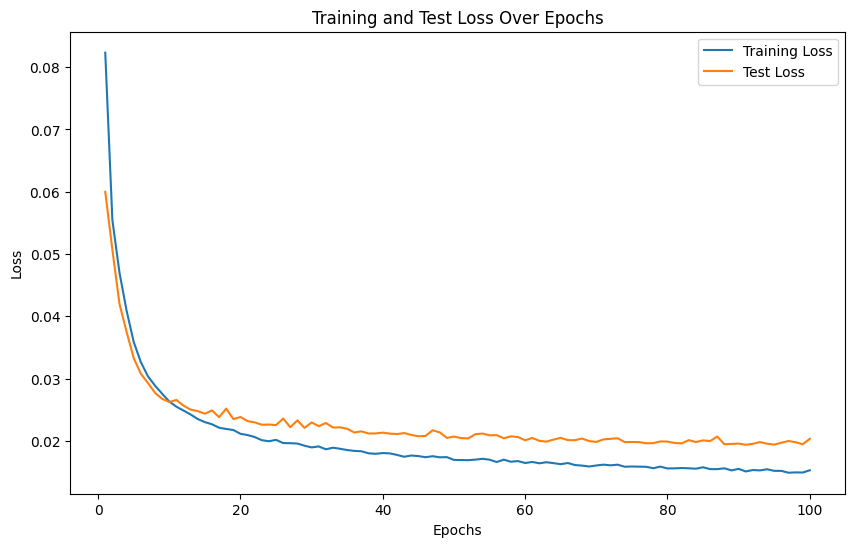

In [ ]:

class MusicDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class MusicPredictor(nn.Module):
    def __init__(self):
        super(MusicPredictor, self).__init__()
        self.fc1 = nn.Linear(50, 128)
        #self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        #x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    list(X), y.values, test_size=0.1, random_state=42
)

# Prepare the training and testing datasets
train_dataset = MusicDataset(X_train, y_train)
test_dataset = MusicDataset(X_test, y_test)

# Move datasets to the appropriate device
train_dataset.X = train_dataset.X.to(device)
train_dataset.y = train_dataset.y.to(device)
test_dataset.X = test_dataset.X.to(device)
test_dataset.y = test_dataset.y.to(device)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model, loss function, and optimizer
model = MusicPredictor().to(device)
criterion = nn.MSELoss()
#criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)
# Initialize lists to store training and test losses
train_losses = []
test_losses = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on the test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_dataloader))

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}")

# Plot the training and test losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/414723640.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/414723640.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_predicted_values[:, i], label="Predicted Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/414723640.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/4

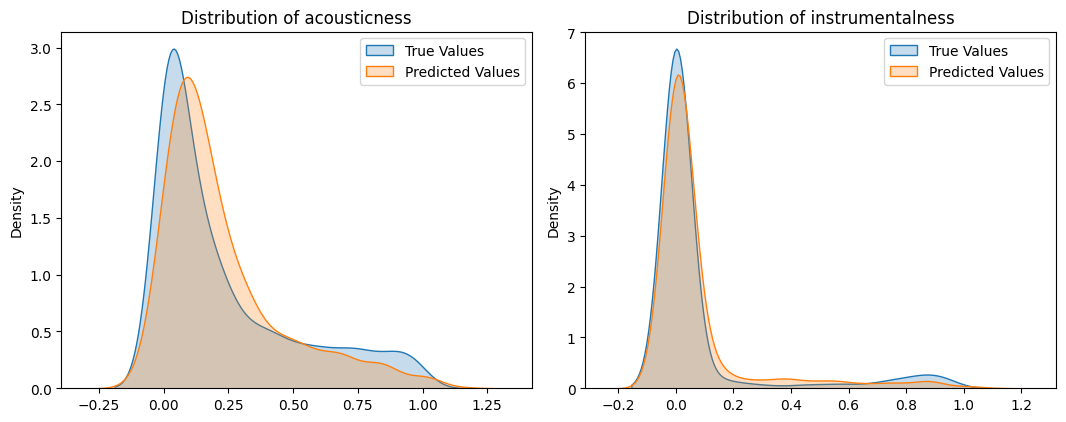

/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_65928/414723640.py:30: RuntimeWarning: divide by zero encountered in divide
  percent_errors = 100 * ((y_test - predictions.cpu().numpy()) / y_test)


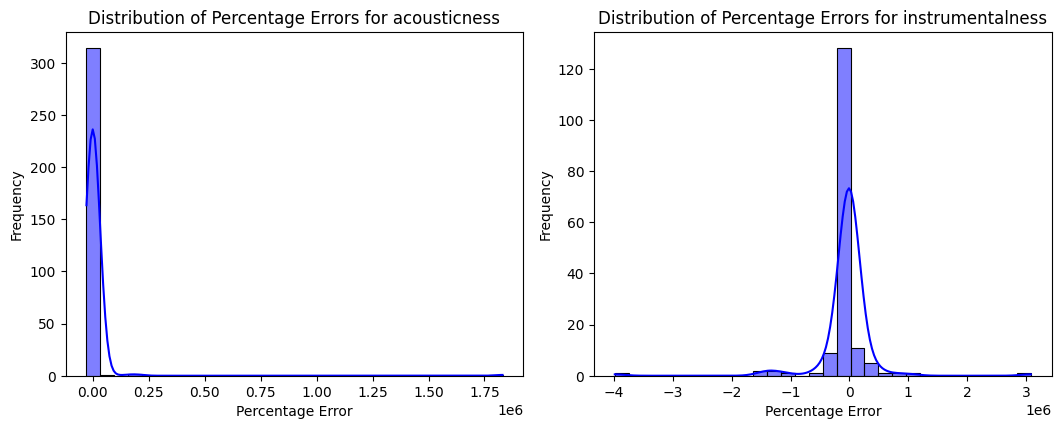

In [89]:


# Combine the true values and predicted values for the entire dataset
all_true_values = np.vstack((y_train, y_test))
all_predicted_values = np.vstack(
    (
    model(torch.tensor(X_train, dtype=torch.float32).to(device)).cpu().detach().numpy(),
    model(torch.tensor(X_test, dtype=torch.float32).to(device)).cpu().detach().numpy()
    )
    )

#feature_names = ["danceability", "speechiness", "acousticness", "instrumentalness"]
feature_names = ["acousticness", "instrumentalness"]

# Create KDE plots for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(all_true_values[:, i], label="True Values", shade=True)
    sns.kdeplot(all_predicted_values[:, i], label="Predicted Values", shade=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()

plt.tight_layout()
plt.show()

# Recompute predictions for the entire test set
model.eval()
with torch.no_grad():
    predictions = torch.cat([model(batch_X.to(device)) for batch_X, _ in test_dataloader], dim=0)
# Calculate the Mean Absolute Error (MAE) for each feature
percent_errors = 100 * ((y_test - predictions.cpu().numpy()) / y_test)


#e = np.min(errors, axis=0), np.mean(errors, axis=0), np.max(errors, axis=0), np.std(errors, axis=0)
#min_ae, mae, max_ae, std_ae = e[0], e[1], e[2], e[3]

# Plot the distribution of percentage errors for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    sns.histplot(percent_errors[:, i], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of Percentage Errors for {feature}")
    plt.xlabel("Percentage Error")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


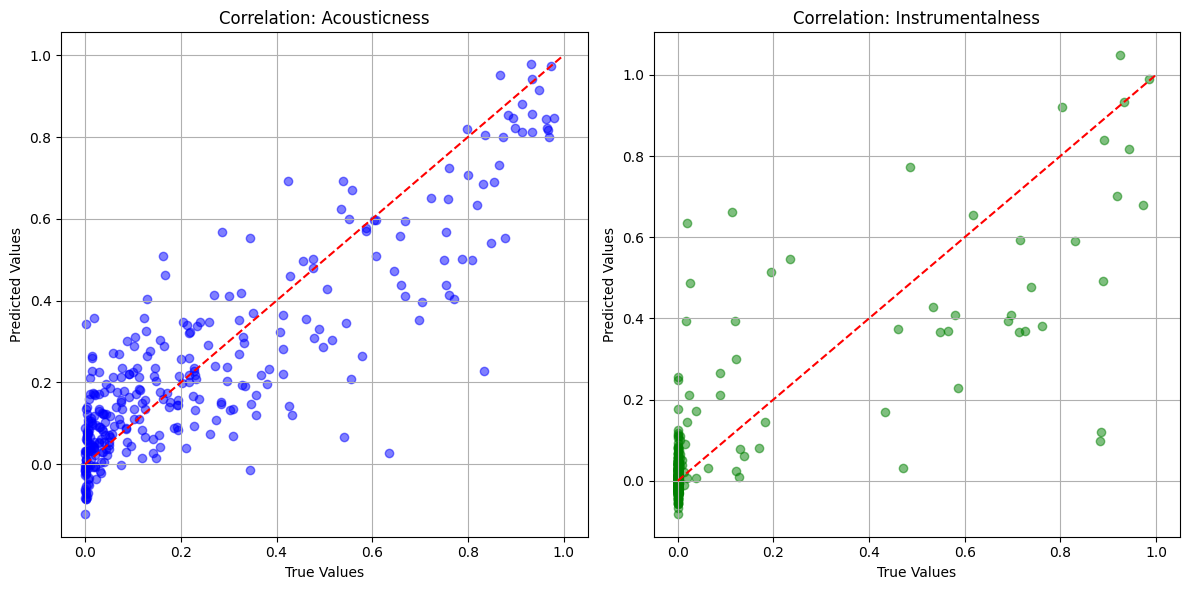

In [ ]:
# Extract true and predicted values for acousticness and instrumentalness
true_acousticness = y_test[:, 0]
predicted_acousticness = predictions[:, 0].cpu().numpy()

true_instrumentalness = y_test[:, 1]
predicted_instrumentalness = predictions[:, 1].cpu().numpy()


# Create scatter plots
plt.figure(figsize=(12, 6))

# Acousticness plot
plt.subplot(1, 2, 1)
plt.scatter(true_acousticness, predicted_acousticness, alpha=0.5, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line of perfect correlation
plt.title("Correlation: Acousticness")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

# Instrumentalness plot
plt.subplot(1, 2, 2)
plt.scatter(true_instrumentalness, predicted_instrumentalness, alpha=0.5, color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line of perfect correlation
plt.title("Correlation: Instrumentalness")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.tight_layout()
plt.show()

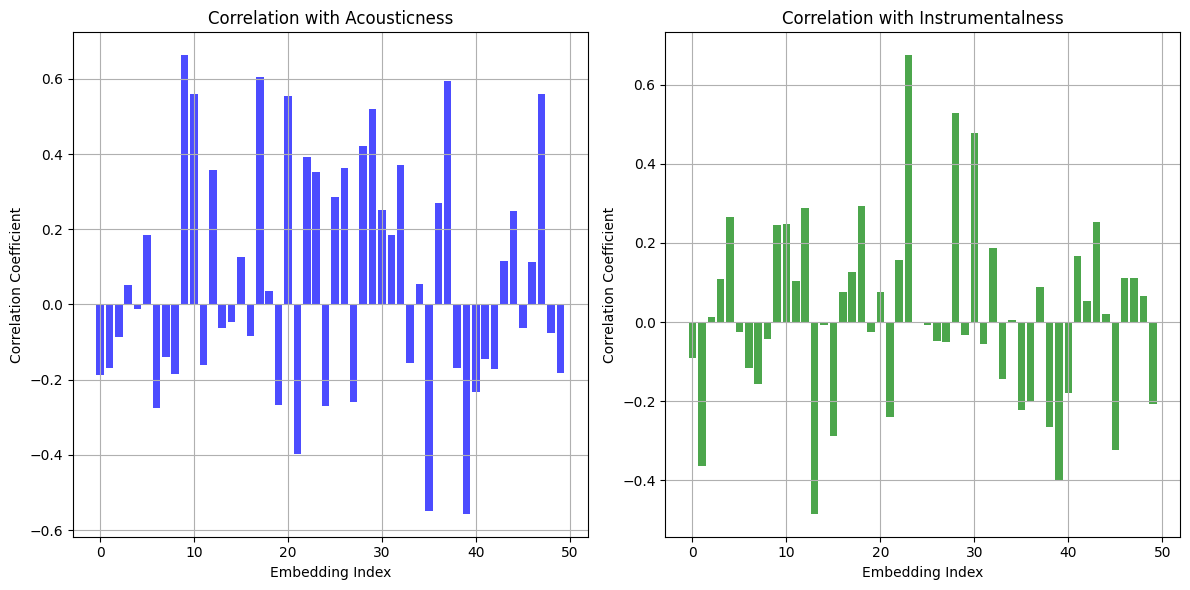

In [98]:

# Convert embeddings and target variables to numpy arrays
embeddings = np.array(list(X))
acousticness = y["acousticness"].values
instrumentalness = y["instrumentalness"].values

# Calculate correlation coefficients
correlation_acousticness = [np.corrcoef(embeddings[:, i], acousticness)[0, 1] for i in range(50)]
correlation_instrumentalness = [np.corrcoef(embeddings[:, i], instrumentalness)[0, 1] for i in range(50)]

# Plot the correlations
plt.figure(figsize=(12, 6))

# Correlation with acousticness
plt.subplot(1, 2, 1)
plt.bar(range(50), correlation_acousticness, color='blue', alpha=0.7)
plt.title("Correlation with Acousticness")
plt.xlabel("Embedding Index")
plt.ylabel("Correlation Coefficient")
plt.grid(True)

# Correlation with instrumentalness
plt.subplot(1, 2, 2)
plt.bar(range(50), correlation_instrumentalness, color='green', alpha=0.7)
plt.title("Correlation with Instrumentalness")
plt.xlabel("Embedding Index")
plt.ylabel("Correlation Coefficient")
plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
# Select an arbitrary index from the test dataset
index = 100  # Change this to any valid index within the range of the test dataset

# Extract the true values and predictions for the selected index
true_values = y_test[index]
# Convert the selected embedding to a tensor and move it to the appropriate device
embedding_tensor = torch.tensor(X_test[index], dtype=torch.float32).to(device)

# Add a batch dimension to the tensor
embedding_tensor = embedding_tensor.unsqueeze(0)

# Recompute the prediction using the model
model.eval()
with torch.no_grad():
    predicted_values = model(embedding_tensor).cpu().numpy()[0]

predicted_values = [round(float(value), 5) for value in predicted_values]
# Print the comparison
print("True Values:", true_values)
print("Predicted Values:", predicted_values)

True Values: [ 0.574   0.512  -6.664   0.0503  0.234   0.      0.0946  0.512 ]
Predicted Values: [0.60848, 0.53942, -6.18866, 0.08555, 0.2768, 0.00083, 0.17302, 0.35327]
